# Analiza i obrada podataka 

Prvo je potrebno instalirati potrebne biblioteke. Ako nisu vec instalirane, potrebno je pokrenuti narednu celiju

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

Potom importujemo te biblioteke i ucitavamo podatke 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('winequality-white.csv', sep=';')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Analiza podataka

Kvalitet vina je velicina koju zelimo da predvidjamo. Ovde mozemo da vidimo prisutne kvalitete vina

In [4]:
df['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

### Korelacija

Kao sto smo videli, korelacija je mera povezanosti izmedju dve promenljive. Ona uzima vrednost izmedju -1 i 1.

Sto je blize 1, to je jaca pozitivna korelacija, a sto je blize -1, to je jaca negativna korelacija (vrednosti blizu 0 oznacavaju da nema korelacije). 

Sada cemo da vidimo koliko je svaka od promenljivih povezana sa kvalitetom vina 

In [5]:
corrs = df.drop("quality", axis=1).apply(lambda x: x.corr(df['quality']))
abs(corrs).sort_values(ascending=False)

alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
dtype: float64

### Vizuelizacija karakteristika

Alkohol deluje kao dobra mera za kvalitet vina. Ajde da malo bolje udjemo u analizu kako alkohol utice na kvalitet vina. Podelicemo kvalitet vina u 3 kategorije: nizak (3,4), srednji (5,6,7) i visok (8,9).

In [7]:
df['quality_cat'] = df['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

<Axes: xlabel='alcohol', ylabel='Count'>

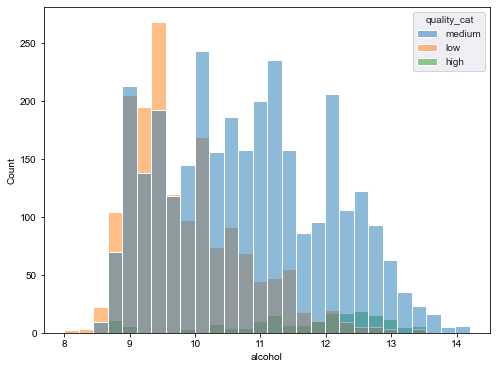

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid')
sns.histplot(data=df, x='alcohol', stat = 'count', hue='quality_cat', common_norm=False)

Uradimo istu analizu za neke od ostalih karakteristika

<Axes: xlabel='density', ylabel='Count'>

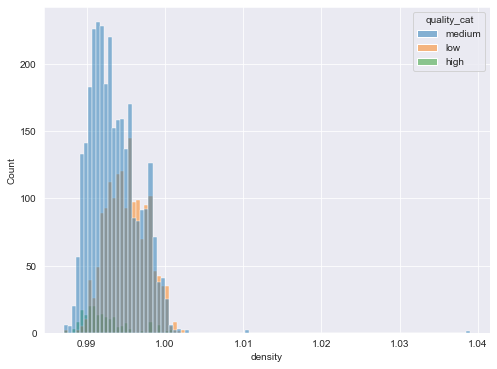

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('darkgrid')
sns.histplot(data=df, x='density', hue='quality_cat', stat = 'count', common_norm=False)

In [10]:
df['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

Kao sto vidimo, prisutni su i neki izuzeci kod ove karakteristike. Izbacicemo ih kako bi se nas model bolje prilagodio realnim podacima (ovakvih ima minimalno i ne mozemo da ocekujemo da jednostavan model uhvati ovakvo ponasanje, te nam samo smetaju)

In [11]:
df = df[df['density'] < 1.005]

## Priprema podataka 

Videcemo dve tehnike pripreme podataka: normalizacija i standardizacija.

### Normalizacija

Normalizacija podrazumeva da sve podatke svedemo da budu u istom intervalu. Za interval se generalno uzima [0, 1] ili [-1, 1]. 

U ovom primeru cemo da svedemo podatke na interval [0, 1]

Pretpostavimo da su podaci u intervalu [min, max]. Tada je normalizacija podataka u interval [0, 1] data sa formulom: $x_{norm} = \frac{x - min}{max - min}$

In [12]:
x_data = df.drop(['quality', 'quality_cat'], axis=1)

In [13]:
x_norm = (x_data - x_data.min()) / (x_data.max() - x_data.min())

In [14]:
print(f"Non_normalized data min: \n{x_data.min()}")
print("")
print(f"Non_normalized data max: \n{x_data.max()}")

Non_normalized data min: 
fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     2.00000
total sulfur dioxide    9.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
dtype: float64

Non_normalized data max: 
fixed acidity            14.20000
volatile acidity          1.10000
citric acid               1.66000
residual sugar           26.05000
chlorides                 0.34600
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.00295
pH                        3.82000
sulphates                 1.08000
alcohol                  14.20000
dtype: float64


In [15]:
print(f"Normalized data min: \n{x_norm.min()}")
print("")
print(f"Normalized data max: \n{x_norm.max()}")

Normalized data min: 
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
dtype: float64

Normalized data max: 
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


### Standardizacija podataka

Standardizacija podataka podrazumeva da se svi podaci transformišu tako da imaju srednju vrednost 0 i standardnu devijaciju 1. Jako cesto je korisno imati ovo svojstvo
kada su u pitanju podaci. To mozemo uraditi tako sto cemo od podataka oduzeti srednju vrednost i podeliti standardnom devijacijom: $ x_{std} = \frac{x - \mu}{\sigma}$

In [16]:
x_std = (x_data - x_data.mean()) / x_data.std()

In [17]:
print(f"Non_standardized data mean: \n{x_data.mean()}")
print("")
print(f"Non_standardized data std: \n{x_data.std()}")

Non_standardized data mean: 
fixed acidity             6.854168
volatile acidity          0.278080
citric acid               0.334159
residual sugar            6.368979
chlorides                 0.045764
free sulfur dioxide      35.313790
total sulfur dioxide    138.340858
density                   0.994012
pH                        3.188241
sulphates                 0.489851
alcohol                  10.514725
dtype: float64

Non_standardized data std: 
fixed acidity            0.843754
volatile acidity         0.100341
citric acid              0.120992
residual sugar           4.975960
chlorides                0.021850
free sulfur dioxide     17.007868
total sulfur dioxide    42.503148
density                  0.002903
pH                       0.151017
sulphates                0.114103
alcohol                  1.230393
dtype: float64


In [18]:
print(f"Standardized data mean: \n{x_std.mean()}")
print("")
print(f"Standardized data std: \n{x_std.std()}")

Standardized data mean: 
fixed acidity           1.625757e-16
volatile acidity       -5.370803e-16
citric acid            -1.741882e-16
residual sugar         -6.822372e-17
chlorides               1.393506e-16
free sulfur dioxide    -8.999724e-17
total sulfur dioxide   -1.509631e-16
density                 2.643016e-14
pH                      2.996037e-15
sulphates              -4.557925e-16
alcohol                -3.716015e-16
dtype: float64

Standardized data std: 
fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


U nastavku cemo koristiti standardizovane podatke

In [19]:
x_data = x_std.copy() 

## Smanjivanje dimenzionalnosti podataka

Sada cemo da vidimo neke tehnike za dublju analizu nasih podataka i smanjenje dimenzionalnosti. Ideja je da predstavimo nase podatke na zgodan nacin, tako da smanjenjem dimensionalnosti ne gubimo informacije (nego ih cak i pametnije predstavimo).

### Sopstveni vektori i sopstvene vrednosti

Cesto je jako zgodno da transformacije predstavljamo u formi matrica. To mozemo predstaviti u formi
$\textbf{y} = A\textbf{x}$, gde je $\textbf{x}$ vektor koji predstavlja ulazne podatke, a $\textbf{y}$ vektor koji predstavlja podatke nakon transformacije.

U opstem slucaju, nakon transformacije se vektoru menja pravac duz kog se prostire. 


#### Primer: $\textbf{x} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, $A = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$. 

Tada je $\textbf{y} = A\textbf{x} = \begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$

Medjutim, postoje vektori $\textbf{x}$ koji ne menjaju pravac prostiranja nakon transformacije, vec se samo skaliraju nekim realnim brojem $\lambda$. Takve vektore $\textbf{x}$ zovemo sopstvenim vektorima, a takve realne brojeve $\lambda$ zovemo sopstvenim vrednostima koje odgovaraju tim sopstvenim vektorima.

Matematicki, to mozemo da zapisemo kao: $A\textbf{x} = \lambda\textbf{x}$

### Primer: $\textbf{x} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$, $A = \begin{bmatrix} 3 & 1 \\ 0 & 2 \end{bmatrix}$. Tada je $\textbf{y} = A\textbf{x} = \begin{bmatrix} 3 & 1 \\ 0 & 2 \end{bmatrix}\begin{bmatrix} -1 \\ 1 \end{bmatrix} = \begin{bmatrix} -2 \\ 2 \end{bmatrix}$.

Vektor $\textbf{x}$ se nakon transformacije samo skalirao sa $\lambda = 2$. Dakle, $\textbf{x}$ je sopstveni vektor, a $\lambda = 2$ je njegova sopstvena vrednost.

Zasto nas zanimaju sopstveni vektori? Oni sustinski predstavljaju pravce duz kojih se podaci "stvarno" prostiru. Sopstvene vrednosti mogu nam daju informaciju o tome kako se prostiru podaci duz tih pravaca.

#### Dekompozicija matrice na sopstvene vektore i sopstvene vrednosti

U python-u, dekompozicija matrice na sopstvene vektore i sopstvene vrednosti se moze uraditi pomocu funkcije `np.linalg.eig()`. Funkcija vraca dva niza: prvi niz sadrzi sopstvene vrednosti, a drugi niz sadrzi sopstvene vektore.

In [20]:
X = np.array([[1, 2], [2, 1]])
eigen_values, eigen_vectors = np.linalg.eigh(X)
print("Eigen vectors",eigen_vectors)
print("Eigen values",eigen_values)

Eigen vectors [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Eigen values [-1.  3.]


### Analiza glavnih komponenti (PCA - Principal Component Analysis)

PCA je jedna od najpopularnijih metoda za smanjivanje dimenzionalnosti podataka. Ideja je da se podaci transformisu tako da se minimizuje gubitak podataka, kao i da se podaci predstave pametnije. 

Algoritam radi na sledeci nacin:

1. Oduzmemo srednju vrednost svake promenljive od date promenljive, tako da podaci budu centrirani oko nule (prosecna vrednost je 0). 

2. Izracunamo kovarijacionu matricu podataka. To je matrica koja racuna kovarijaciju izmedju svake dve promenljive. 

3. Izracunamo sopstvene vektore i sopstvene vrednosti kovarijacione matrice. Motivacija ovde je da nadjemo pravce duz kojih se podaci prostiru, pa potom da vidimo koji od ovih pravaca su najbitniji.

4. Sortiramo sopstvene vrednosti u opadajucem redosledu, i odaberemo $k$ najvecih sopstvenih vrednosti. Ovo je broj komponenti koje zelimo da izdvojimo iz podataka (k cemo da izaberemo empirijski).

5. Podatke transformisemo pomocu ove nove matrice transformacije

<img src="pca.gif" width="400">

In [21]:
def PCA(X, k):
    # centriranje podataka
    X = X - np.mean(X, axis=0)
    # matrica kovarijacije
    cov = np.cov(X, rowvar = False)
    # uzimamo sopstvene vrednosti i sopstvene vektore
    eigen_values, eigen_vectors = np.linalg.eigh(cov)
    # soriramo opadajuce po sopstvenim vrednostima
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    # odabiramo prvih k komponenti
    eigen_vectors = eigen_vectors[:, :k]
    # transformisemo podatke u novi prostor
    X = np.dot(X, eigen_vectors)
    return X

In [22]:
len(x_data.columns)

11

In [23]:
x_data_pca = PCA(x_data, 2)
x_data_pca.shape[1]

2

<Axes: >

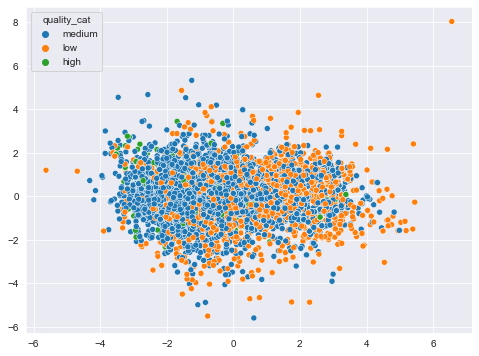

In [24]:
# plot first two components of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_data_pca[:, 0], y=x_data_pca[:, 1], hue=df['quality_cat'])


## Klasterizacija - K-means

Klasterizacija podrazumeva podelu podataka u odredjene grupe - klastere. K-means je jedan od najpopularnijih algoritama za klasterizaciju. Potrebno je proslediti broj k, tj. broj klastera koji zelimo da dobijemo.

Algoritam radi na sledeci nacin:
1. Nasumicno odaberemo $k$ tacaka, koje predstavljaju inicijalne centre klastera - centroide. 
2. Svaku tacku podelimo u klaster na osnovu toga kojem centroidu je najblizi.
3. Izracunamo novi centroid za svaki klaster tako sto izracunamo srednju vrednost svih tacaka u tom klasteru.
4. Ponavljamo korake 2 i 3 dok algoritam ne iskonvergira.

<img src="kmeans.gif" width="600">

In [25]:
def KMeans(data, k):
    data=  np.array(data)
    # inicijalizacija centroida - biramo random k nasumicnih tacaka iz skupa i vadimo njihove ficere
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    # iteracija dok se centroidi ne stabilizuju
    while True:
        # racunanje euklidske udaljenosti - shape : (2, 4895)
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        # odredjivanje klastera - jedinica ili nula (ili druga labela) u zavisnosti od pripadnosti klasteru
        clusters = np.argmin(distances, axis=0)
        # racunanje novih centroida
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
        # provera da li su centroidi stabilizovani
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [32]:
centroids, clusters = KMeans(x_data, 2)

In [33]:
centroids

array([[-0.11424317, -0.03089469, -0.15325618, -0.57281336, -0.25862949,
        -0.39373429, -0.50574297, -0.64280285,  0.13309096, -0.04129572,
         0.52143406],
       [ 0.17356966,  0.04693831,  0.23284212,  0.87027536,  0.3929358 ,
         0.59820053,  0.76837532,  0.9766104 , -0.20220511,  0.06274058,
        -0.7922148 ]])

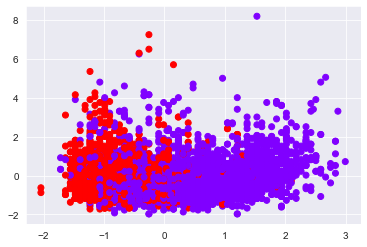

In [37]:
x_data_sub = x_data[['alcohol', 'volatile acidity']]

# prikaz klastera za ove dve karakteristike
plt.scatter(x_data_sub['alcohol'], x_data_sub['volatile acidity'], c=clusters, cmap='rainbow')

In [138]:
x_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

# Generisani podaci

K Means klasterizacija nad generisanim odbircima koji pripadaju normalnim raspodelama

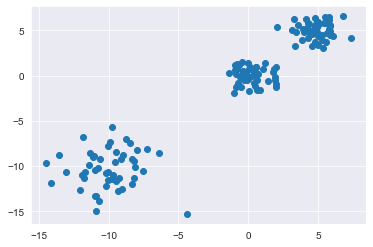

In [59]:
# data of 3 normal distributions - 50 points per class
data = np.concatenate([np.random.normal(0, 1, (50, 2)), np.random.normal(5, 1, (50, 2)), np.random.normal(-10, 2, (50, 2))], axis=0)

# plot data
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.show()

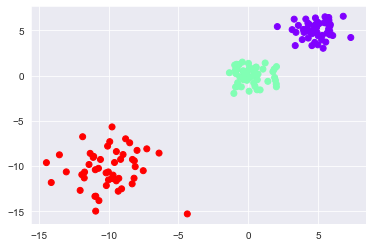

In [61]:
centroids_data, clusters_data = KMeans(data, 3)

plt.plot()
plt.scatter(data[:, 0], data[:, 1], c=clusters_data, cmap='rainbow')
plt.show()

PCA na 3d generisanim odbircima koji pripadaju normalnim raspodelama

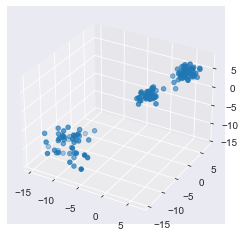

In [69]:
# data of 3 normal distributions - 50 points per class
data = np.concatenate([np.random.normal(0, 1, (50, 3)), np.random.normal(5, 1, (50, 3)), np.random.normal(-10, 2, (50, 3))], axis=0)
label = np.concatenate([np.zeros(50), np.ones(50), np.ones(50) * 2])

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
plt.show()

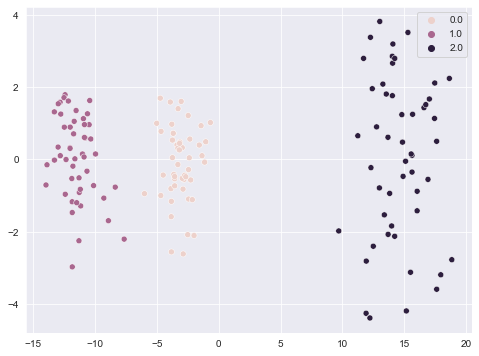

In [74]:
x_pca = PCA(data, 2)

# plot first two components of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=label)
plt.show()